**Python Version   : 2.7.11** <br>
**Ipython Version  : 4.0.1**

In [1]:
try:
    import ipy_table
except ImportError, e:
    !pip install ipy_table
    
import os
import six
import gzip
import pylab
import cPickle
import traitlets
import numpy as np
from ipy_table import *
from itertools import izip as zip, count
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from matplotlib.mlab import PCA

# let's embed the plots in the notebook itself
%matplotlib inline

In [2]:
# Load the dataset
f = gzip.open('data/mnist.pkl.gz', 'rb')

# 50,000 , 10,000, 10,000 images
train_set, valid_set, test_set = cPickle.load(f)
f.close()

# An array of 50,000 images, each image is itself an array of 784 values (gray scale between 0 and 1)
training_inputs = [np.reshape(x, (1, 784)) for x in train_set[0]]

# 50,000  integers that encode the corresponding labels 
training_results = [y for y in train_set[1]]

In [3]:
def set_mnist_pos_neg(positive_label, negative_label):
    """
    Generates postitive and negative classes based on the provided labels
    
    Arguments:
    
    positive_label -- digit for the positive class
    negative_label -- digit for the negative class 
    
    Returns:
    
    Returns images with postive and negative labels    
    """
    positive_indices = [i for i, j in zip(count(), training_results) if j == positive_label]
    negative_indices = [i for i, j in zip(count(), training_results) if j == negative_label]
    
    pos_images = [ training_inputs[index] for index in positive_indices ]
    neg_images = [ training_inputs[index] for index in negative_indices ]
    
    fig = pylab.figure()
    ax = fig.add_subplot(1, 2, 1)
    pylab.imshow(pos_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax = fig.add_subplot(1, 2, 2)
    pylab.imshow(neg_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    pylab.show()
    
    return pos_images, neg_images

In [4]:
def pca_analysis(positive_label, negative_label):
    positive_images, negative_images = set_mnist_pos_neg(positive_label, negative_label)
    positive_images_array = np.array([np.array(xi[0]) for xi in positive_images])
    negative_images_array = np.array([np.array(xi[0]) for xi in negative_images])
    
    M = np.append(positive_images_array, negative_images_array, 0)

    mypca = PCA(M, standardize = False)

    pos_points = mypca.project(positive_images_array[:200])
    neg_points = mypca.project(negative_images_array[:200])

    pylab.plot(pos_points[:,0], pos_points[:,1], 'bo')
    pylab.plot(neg_points[:,0], neg_points[:,1], 'ro')

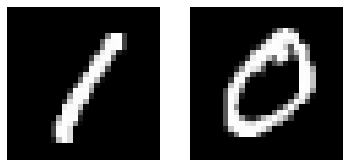

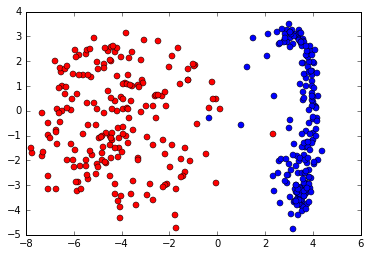

In [5]:
pca_analysis(1, 0)

For 1 vs 0, a line can separate the classes. 

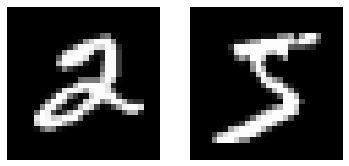

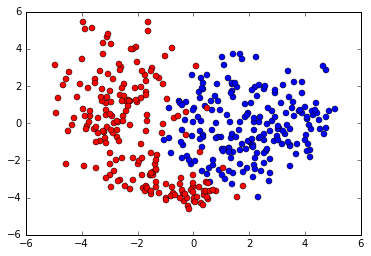

In [6]:
pca_analysis(2, 5)

As you can see, classes intersect. Hence, a line cannot separate the classes. We need to employ Multi Layer Perceptron to solve this.